<a href="https://colab.research.google.com/github/yraj1996/Bike-Sharing-Demand-Prediction/blob/main/ML_Bike_Sharing_Demand_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime 
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss




### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
bike_df=pd.read_csv('/content/drive/MyDrive/ALMA BETTER Capstone Project/Bike Sharing Demand/SeoulBikeData.csv',encoding ='unicode_escape')

### Dataset First View

In [4]:
# Dataset First Look
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
bike_df.shape

(8760, 14)

### Dataset Information

In [6]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
bike_df[bike_df.duplicated()]
bike_df.duplicated().sum()


0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
bike_df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### What did you know about your dataset?

Answer Here




## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [10]:
# Dataset Describe
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description 

**Breakdown of Our Features:**

**Date** : *The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str*, we need to convert into datetime format.

**Rented Bike Count** : *Number of rented bikes per hour which our dependent variable and we need to predict that, type : int*

**Hour**: *The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.*

**Temperature(°C)**: *Temperature in Celsius, type : Float*

**Humidity(%)**: *Humidity in the air in %, type : int*

**Wind speed (m/s)** : *Speed of the wind in m/s, type : Float*

**Visibility (10m)**: *Visibility in m, type : int*

**Dew point temperature(°C)**: *Temperature at the beggining of the day, type : Float*

**Solar Radiation (MJ/m2)**: *Sun contribution, type : Float*

**Rainfall(mm)**: *Amount of raining in mm, type : Float*

**Snowfall (cm)**: *Amount of snowing in cm, type : Float*

**Seasons**: *Season of the year, type : str, there are only 4 season's in data *. 

**Holiday**: *If the day  is holiday period or not, type: str*

**Functioning Day**: *If the day is a Functioning Day or not, type : str*

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# changing column names.

bike_df=bike_df.rename(columns={'Rented Bike Count':'Rented_bike_count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation', 
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [13]:
#splitting date into day, month and year.
bike_df['Date']=bike_df['Date'].apply(lambda x:dt.datetime.strptime(x,"%d/%m/%Y"))

In [14]:
bike_df['year']=bike_df['Date'].dt.year
bike_df['month']=bike_df['Date'].dt.month
bike_df['day']=bike_df['Date'].dt.day_name()

In [15]:
# Converting days into weekday and weekend.
bike_df['weekdays_weekend']=bike_df['day'].apply(lambda x:1 if x=='Saturday' or x=='Sunday' else 0)

In [16]:
bike_df.head(1)

,Date,Rented_bike_count,Hour,Temperature,Humidity,wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,year,month,day,weekdays_weekend
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday,0


In [17]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented_bike_count      8760 non-null   int64         
 2   Hour                   8760 non-null   int64         
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   wind_speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew_point_temperature  8760 non-null   float64       
 8   Solar_Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

In [18]:
bike_df['year'].value_counts()

2018    8016
2017     744
Name: year, dtype: int64

In [19]:
bike_df['month'].value_counts()

12    744
1     744
3     744
5     744
7     744
8     744
10    744
4     720
6     720
9     720
11    720
2     672
Name: month, dtype: int64

In [20]:

bike_df['month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [21]:
# dropping irrelevent coloumns.
bike_df=bike_df.drop(columns=['Date','day','year'],axis=1)

In [22]:
# changing data type.
colmns=['Hour','month','weekdays_weekend']
for i in colmns:
    bike_df[i]=bike_df[i].astype('category')

### What all manipulations have you done and insights you found?

* Convert the "date" column into 3 different column i.e "year","month","day".
* Converting days into weekdays_weekend column for better analysis.
* count the unique value of some columns to get the broader idea about the features and data.
* Changing data types for Hour, month and weekdays_weekend into categorical. It helps in to understandig the  furthur analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### EDA(Exploratory Data Analysis)
We are going to perform EDA on Bike_df( data about Rental bikes) and going to analyse each features and their relationship with other features with the help of plotting some grpahs and charts for better understanding via visualization.




### Analyzing the relationship between dependent variable and categorical independent variables:

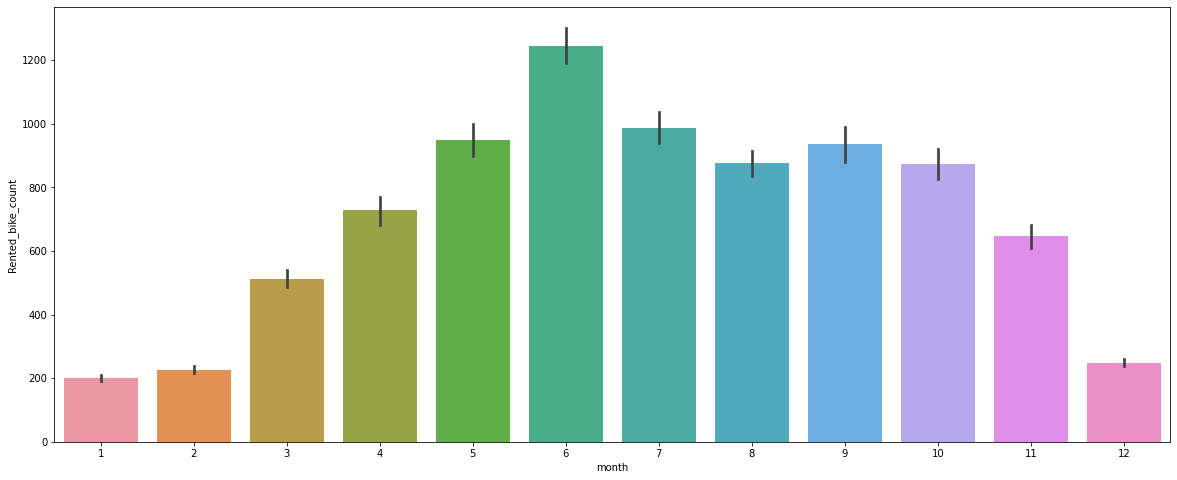

In [23]:
# Chart - 1 visualization code
plt.subplots(figsize=(20,8))
sns.barplot(x='month',data=bike_df, y='Rented_bike_count')

##### 1. Why did you pick the specific chart?

* we use bar plot because it is helpful in recognizing the different pattern among months.
* This chart shows us number of bike rented in each specific month. 


##### 2. What is/are the insight(s) found from the chart?

* from the month 5 to 10 the demand of the rented bike is high as compare to other months.these months are comes inside the summer season and autumn sesons.
* number of bike rented in June is high  in comparison to other months.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* This chart helps us to understand the best months in which people prefer to rent bike. 
* We can design the layout about traffic, pricing and other offers around this insights.

#### Chart - 2

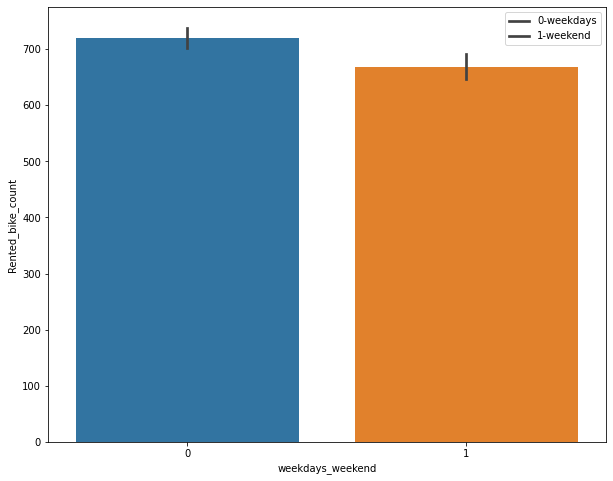

In [24]:
plt.subplots(figsize=(10,8))
sns.barplot(x='weekdays_weekend',data=bike_df, y='Rented_bike_count')
plt.legend(['0-weekdays','1-weekend'])

##### 1. Why did you pick the specific chart?

It shows the relationship between a numeric and a categoric variable.

##### 2. What is/are the insight(s) found from the chart?

from above bar graph we can clearly see there is slight changes in bike rented on weekday and  weekend. 




##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It give little insight that no matter if day is weekday or weekend, people usually take bike on rent each day and this might be a positive point for a business and we can introduce some better options to lure customers on weekends.

#### Chart - 3

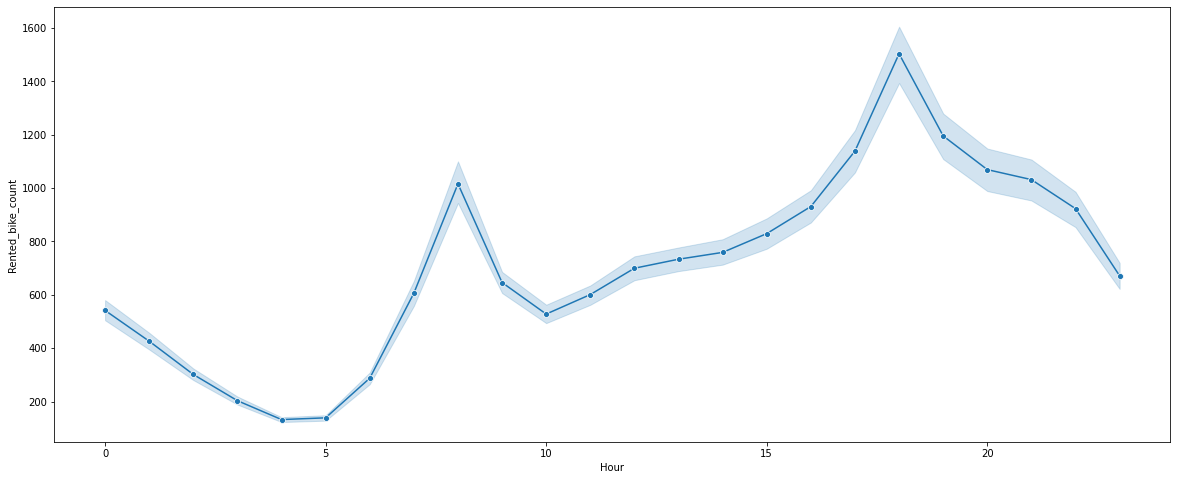

In [25]:
# Chart - 3 visualization code
plt.subplots(figsize=(20,8))
sns.lineplot(x='Hour',data=bike_df, y='Rented_bike_count',linestyle='-',marker='o')

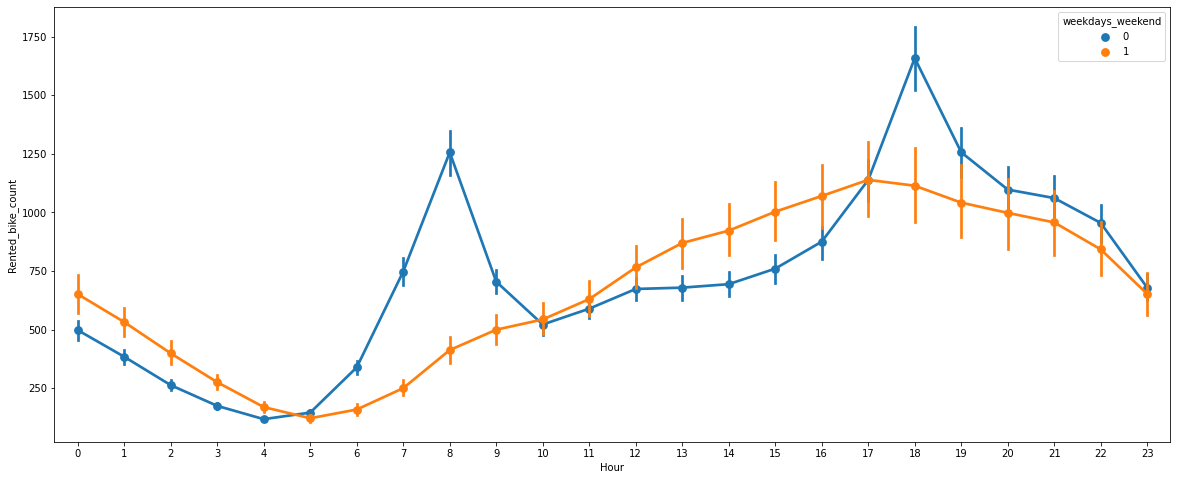

In [26]:
plt.subplots(figsize=(20,8))
sns.pointplot(x='Hour',y='Rented_bike_count',hue='weekdays_weekend',data=bike_df)

##### 1. Why did you pick the specific chart?

Line plot give better visualization about data which change over time.

##### 2. What is/are the insight(s) found from the chart?

* From above line graph we can see that huge number of bike rented at peak rush time that is  at 8AM and 6 PM.
 
* The orange colur represent the weekend days, and it show that the demand of rented bikes are very low specially in the morning hour but when the evening start from 4 pm to 8 pm the demand slightly increases.





##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight can contribute in postive term as company should know at what time bike demand is high.

#### Chart - 4

Text(0.5, 1.0, 'Count of rented bike on functioning day and non functioning day')

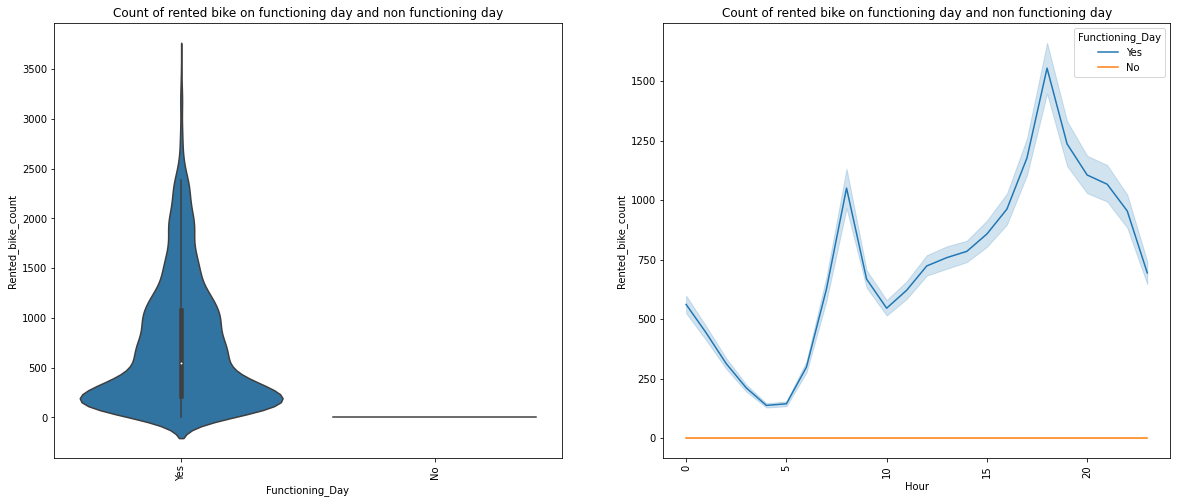

In [27]:
# Chart - 4 visualization code
plt.subplots(figsize=(20,8))
plt.subplot(1, 2, 1)
sns.violinplot(data=bike_df,x='Functioning_Day',y='Rented_bike_count')
plt.xticks(rotation = 90)
plt.title("Count of rented bike on functioning day and non functioning day")
plt.subplot(1,2,2)
sns.lineplot(data=bike_df,x='Hour',y='Rented_bike_count',hue='Functioning_Day')
plt.xticks(rotation=90)
plt.title("Count of rented bike on functioning day and non functioning day")

##### 1. Why did you pick the specific chart?

Here we pick two type of charts that is Violin plot and line chart.

*   Both charts tell the same story that number of bike rented on Functiuoning day and Non Functiong Day.
*  A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data. It is used to visualize the distribution of numerical data.
* Where as line chart showing the change in data with respect to time of both Functioning day and Non functioning day.



##### 2. What is/are the insight(s) found from the chart?

people don't take bike on rent on Non functioning day.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There ain't any positive or negative impact of this feature on business.

#### Chart - 5

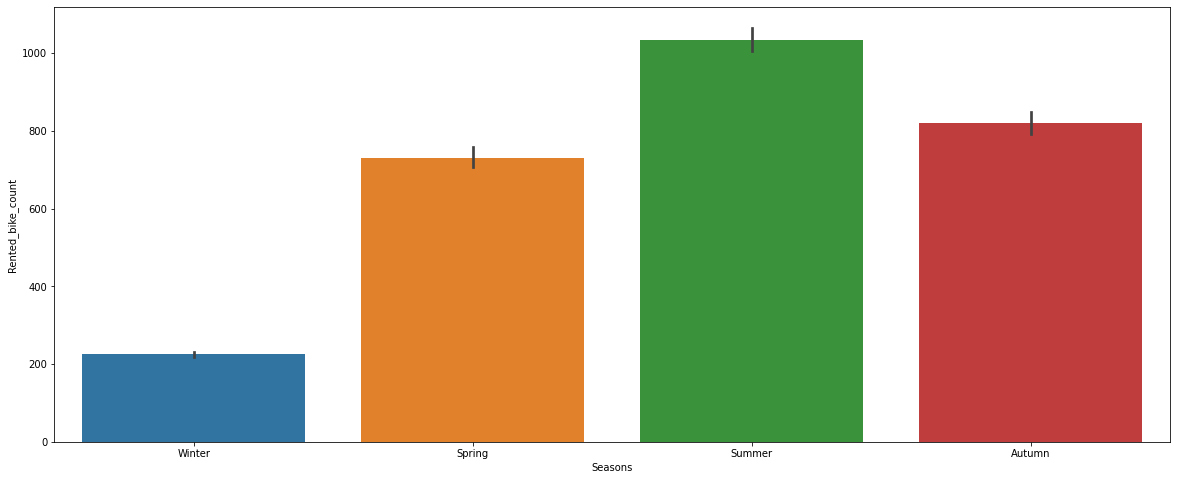

In [28]:
# Chart - 5 visualization code
plt.subplots(figsize=(20,8))
sns.barplot(data=bike_df,x='Seasons',y='Rented_bike_count')

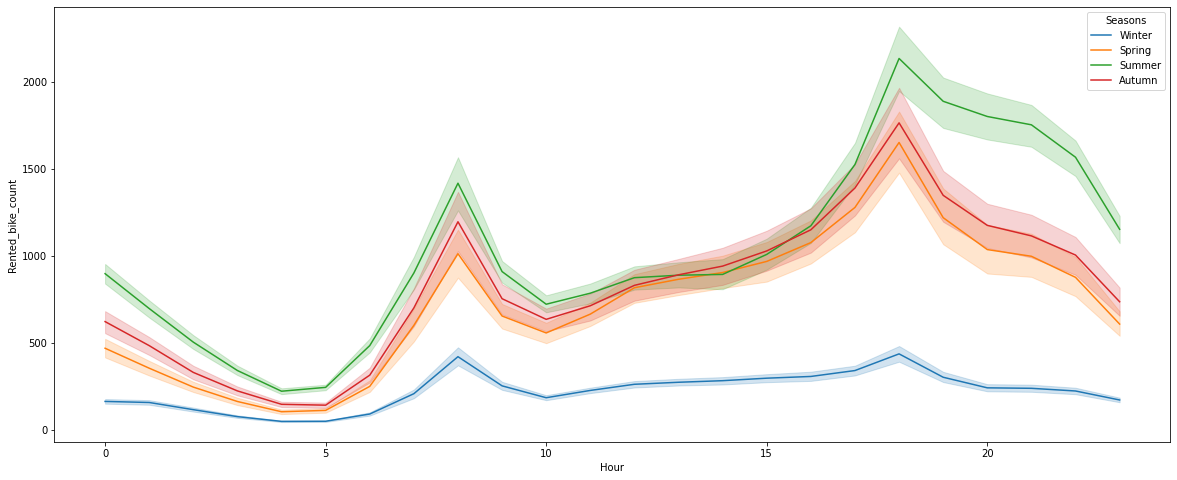

In [29]:
plt.subplots(figsize=(20,8))
sns.lineplot(data=bike_df,x='Hour',y='Rented_bike_count',hue='Seasons')

##### 1. Why did you pick the specific chart?

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.

A line graph or line chart or line plot is a graph that utilizes points and lines to represent change over time.

In the above bar plot and line chart which shows the use of rented bike in in four different seasons.

##### 2. What is/are the insight(s) found from the chart?

* In summer season the use of rented bike is high and peak time is 7am-9am and 7pm-5pm.
* In winter season the use of rented bike is very low.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insight from above chart can help business to understands the seasons and timing in which bike are in more demand.

#### Chart - 6

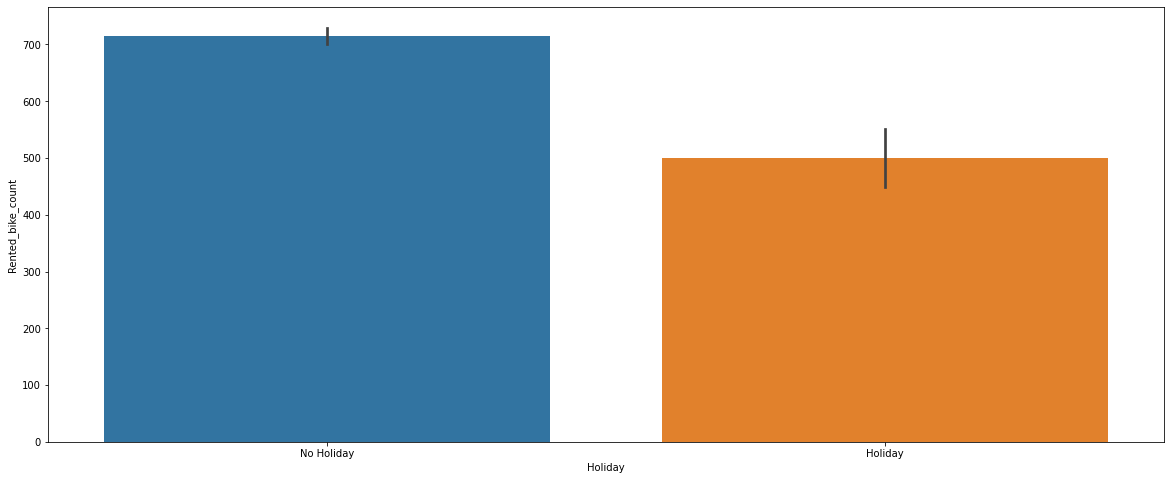

In [30]:
# Chart - 6 visualization code
plt.subplots(figsize=(20,8))
sns.barplot(x='Holiday',y='Rented_bike_count',data=bike_df)

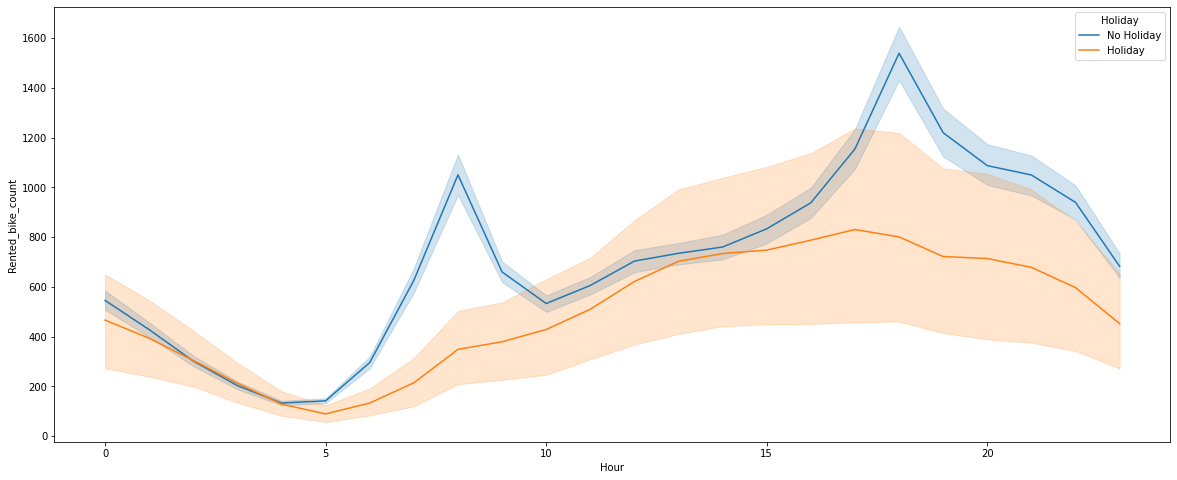

In [31]:
plt.subplots(figsize=(20,8))
sns.lineplot(x='Hour',y='Rented_bike_count',hue='Holiday',data=bike_df)

##### 1. Why did you pick the specific chart?

Bar chart helps us to understand the comparison between the given numerical data. Where as line chart telling about changes in data w.r.t time.

##### 2. What is/are the insight(s) found from the chart?

*   In the above bar plot and line plot which shows the more use of rented bike in a no-holiday.

*   plot shows that in holiday people uses the rented bike from 2pm-8pm



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights found will definitely help for a positive business impact. It shows how people prefer bikes more on regular days in comparison of holidays.
It helps the company to understand that on high number of people using their bike on regular days. There would be more demand of bikes and company can plan according to it.

### Distplot Chart - Analyzing the distribution of continuous independent variables

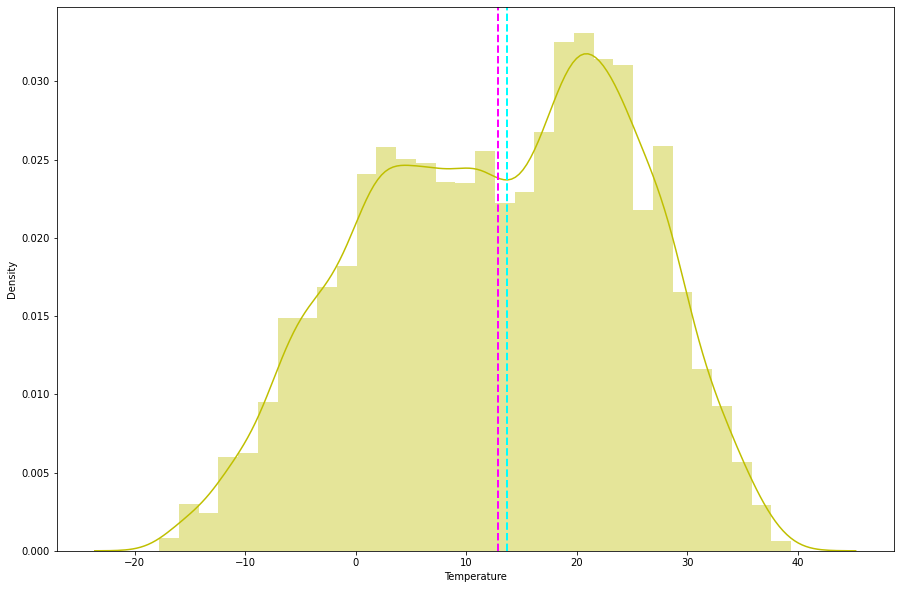

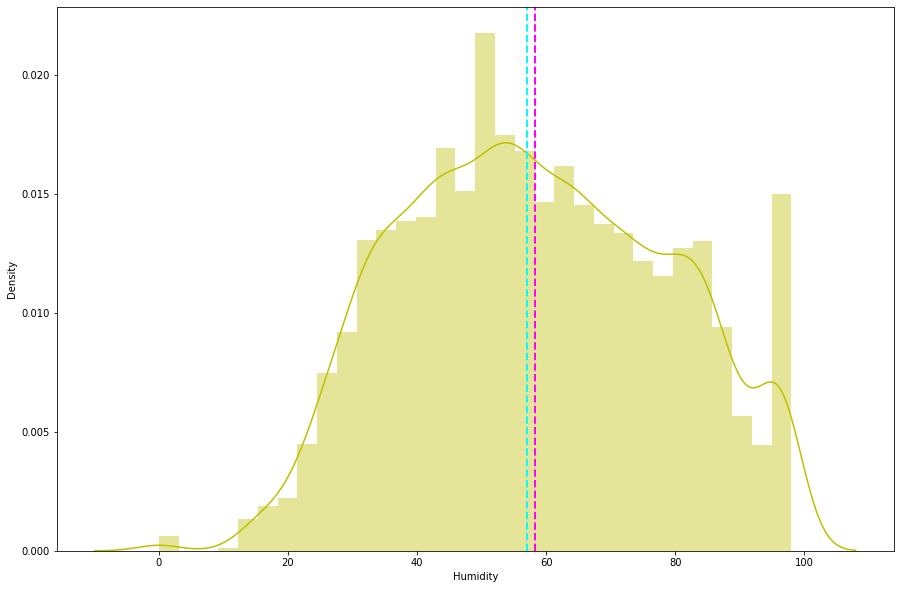

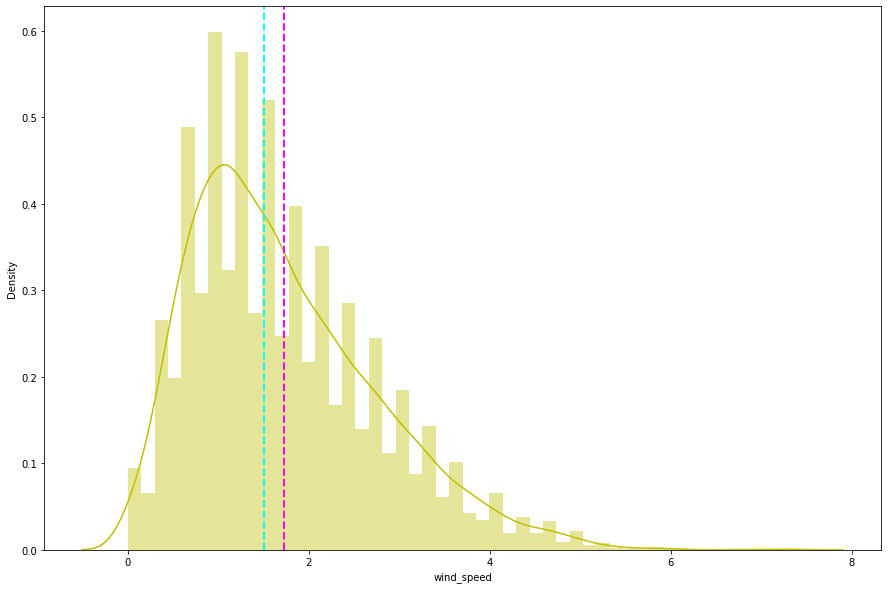

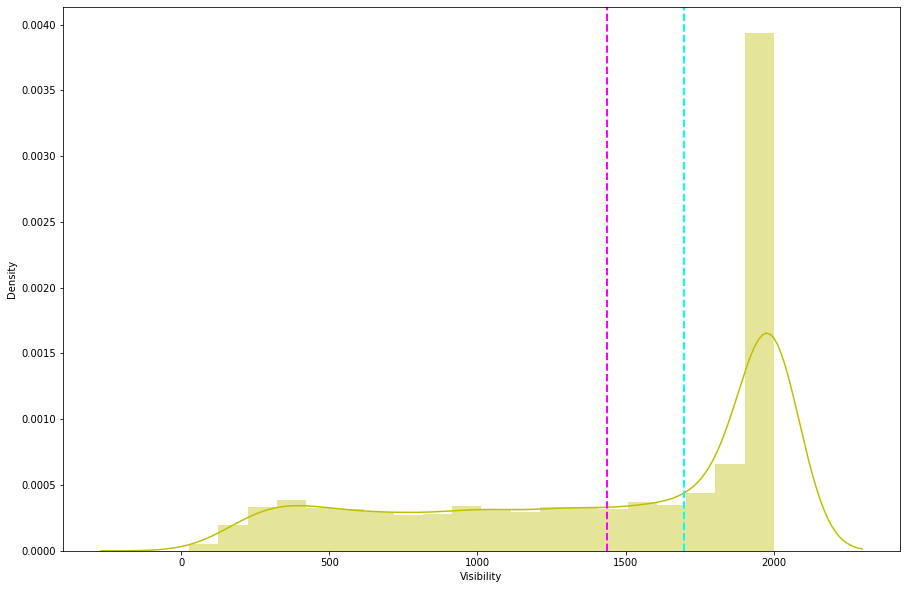

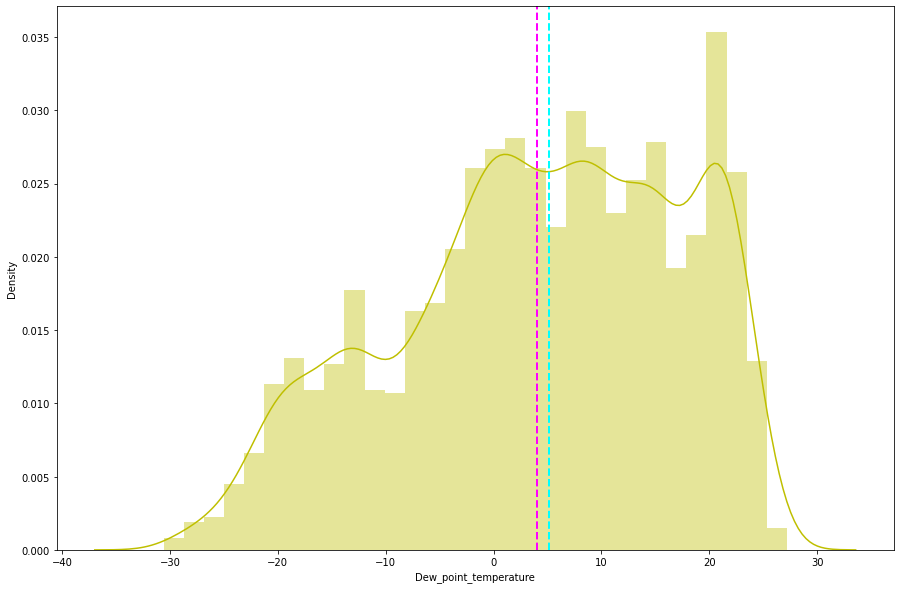

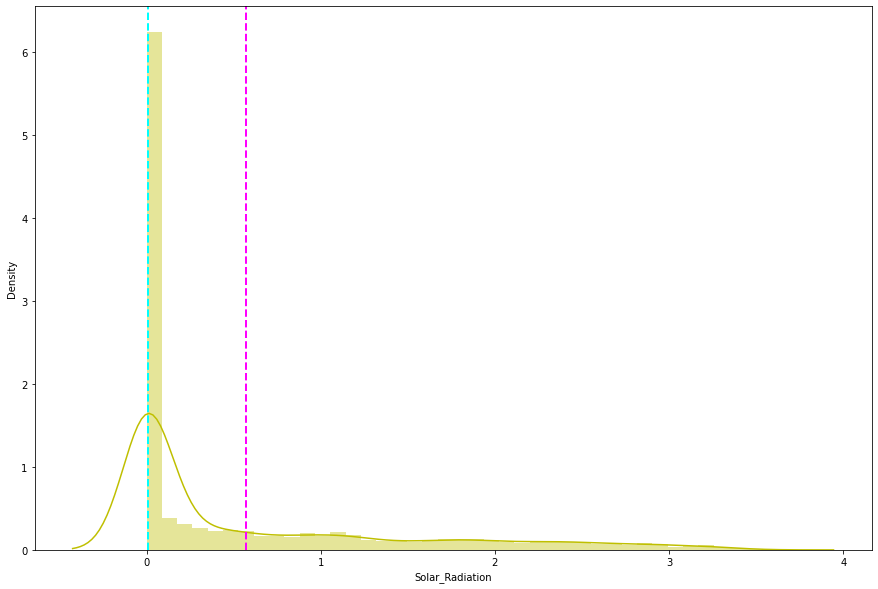

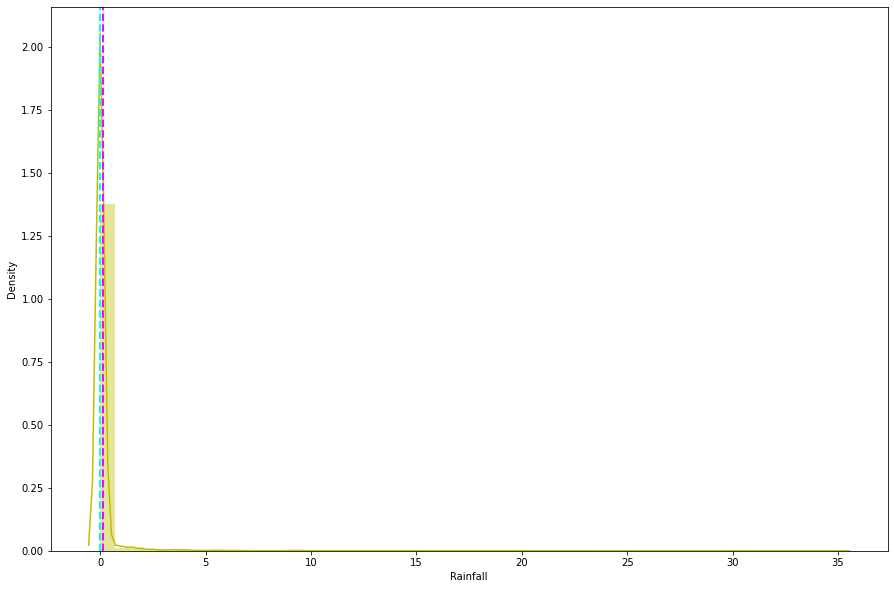

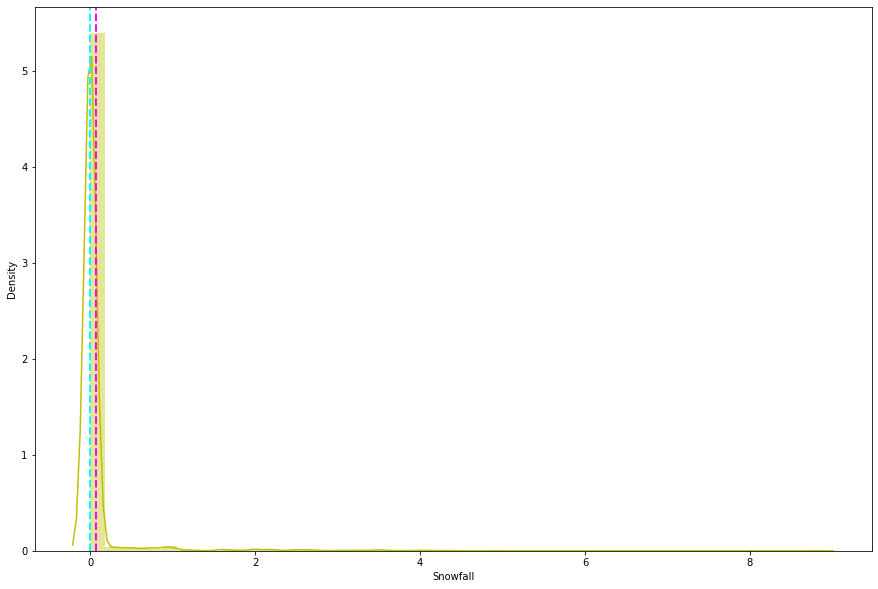

In [32]:
# Chart - 7 visualization code
numerical_columns=list(['Temperature', 'Humidity', 'wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'])

for col in numerical_columns:
  plt.figure(figsize=(15,10))
  sns.distplot(x=bike_df[col],color='y')
  plt.axvline(bike_df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(bike_df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.xlabel(col)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - Analyzing the distribution of the dependent variable:

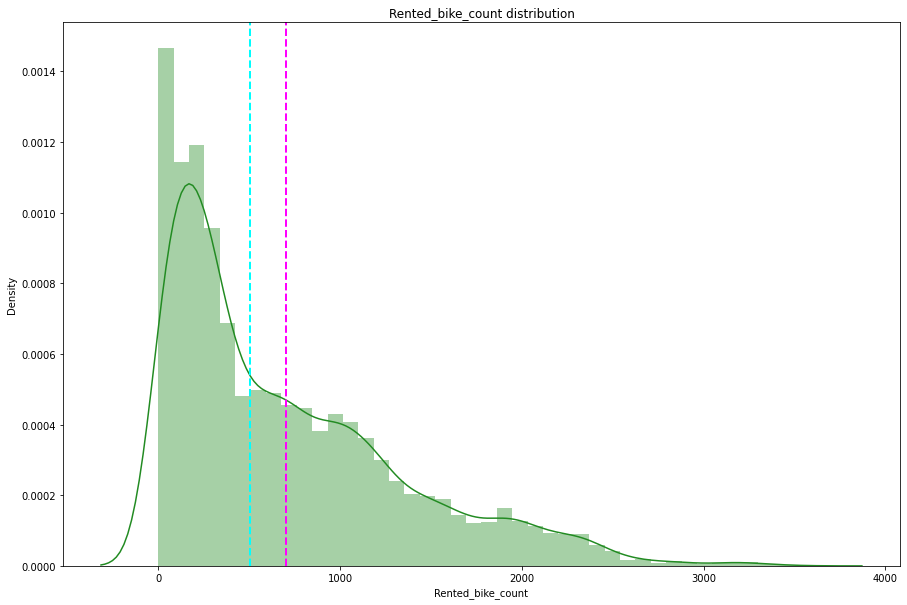

In [33]:
# Chart - 8 visualization code
plt.figure(figsize=(15,10))
sns.distplot(bike_df['Rented_bike_count'],color='forestgreen')
plt.xlabel('Rented_bike_count')
plt.title('Rented_bike_count distribution')
plt.axvline(bike_df['Rented_bike_count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(bike_df['Rented_bike_count'].median(), color='cyan', linestyle='dashed', linewidth=2)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

### Chart - Analyzing the relationship between dependent variable and continuous independent variables:

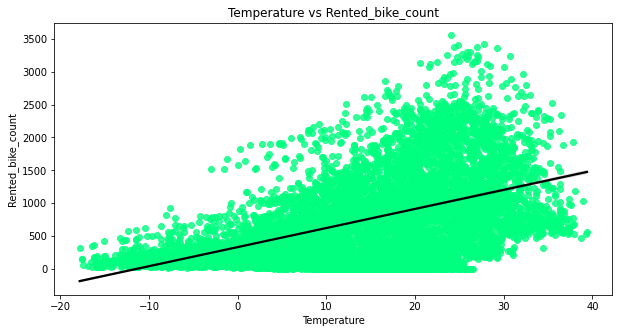

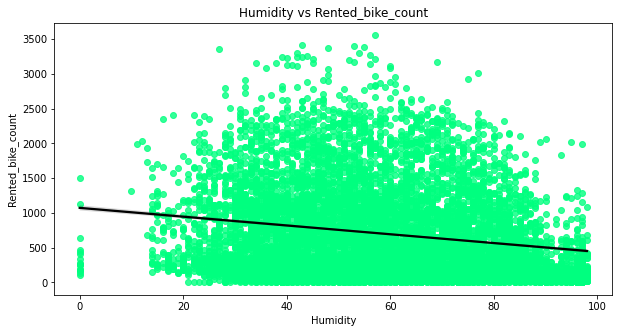

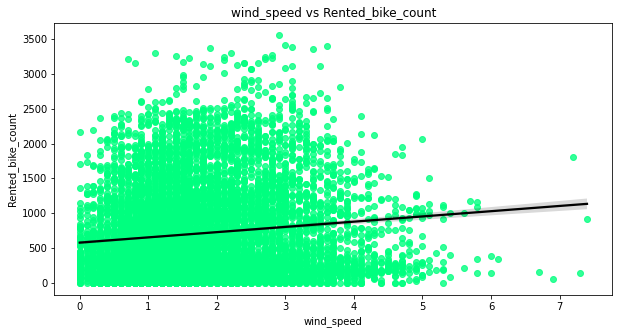

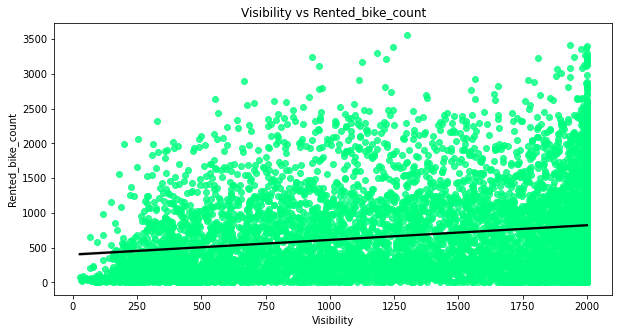

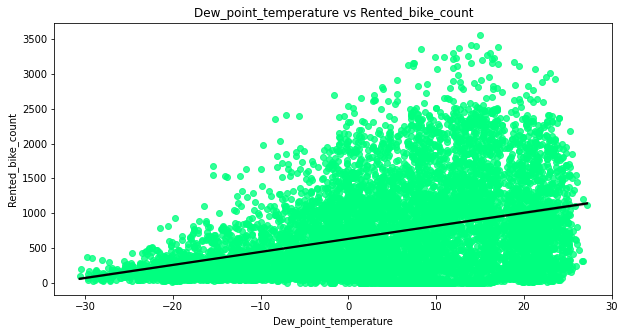

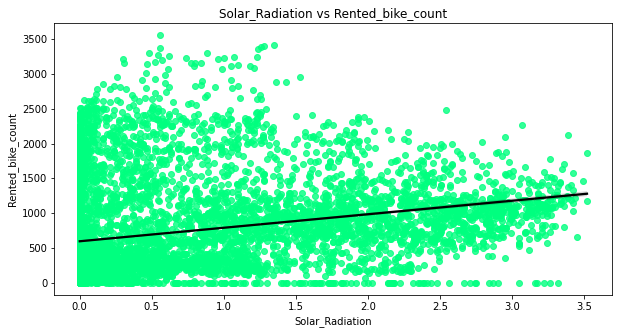

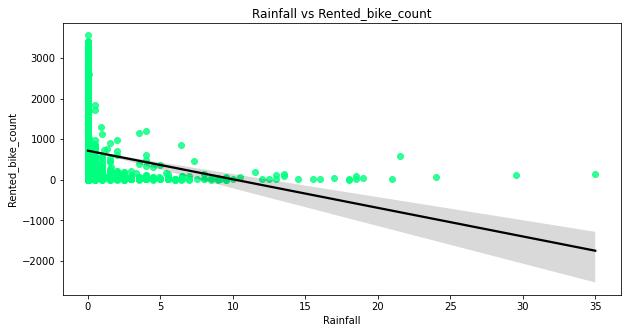

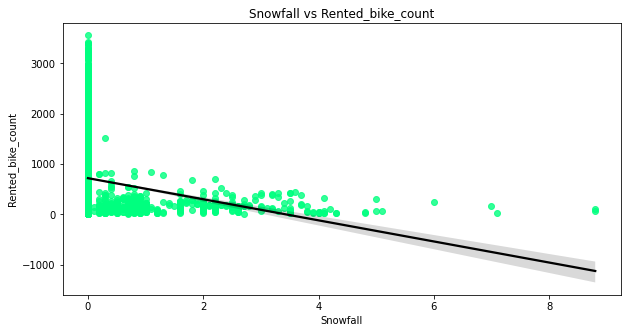

In [34]:
# Chart - 9 visualization code
for i in numerical_columns:
  plt.figure(figsize=(10,5))
  sns.regplot(x=i,y='Rented_bike_count',data=bike_df,line_kws={"color": "black"},scatter_kws={"color": 'springgreen'})
  plt.xlabel(i)
  plt.ylabel('Rented_bike_count')
  plt.title(i+' vs '+ 'Rented_bike_count')
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - - Correlation Heatmap

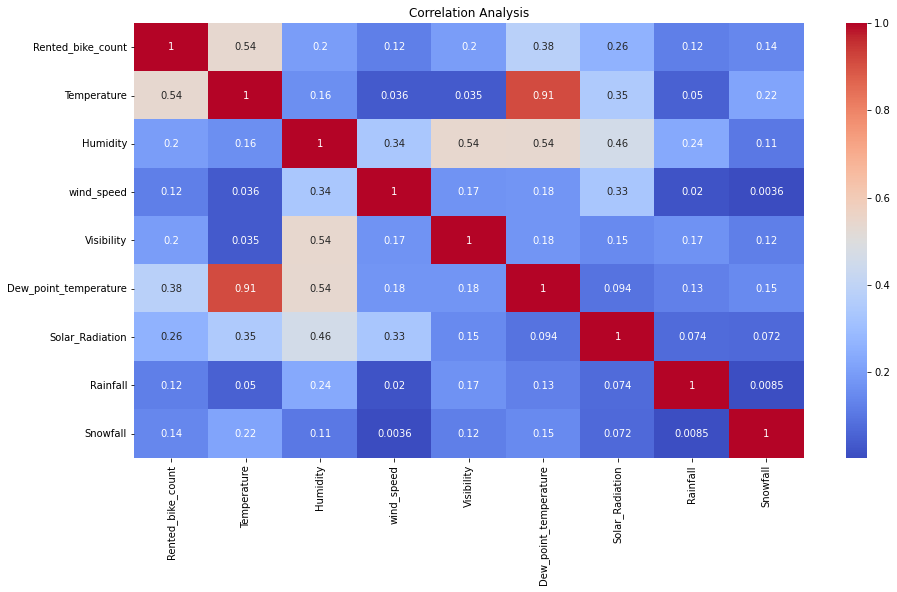

In [35]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,8))
plt.title('Correlation Analysis')
correlation = bike_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart  - Pair Plot 

<Figure size 1080x720 with 0 Axes>

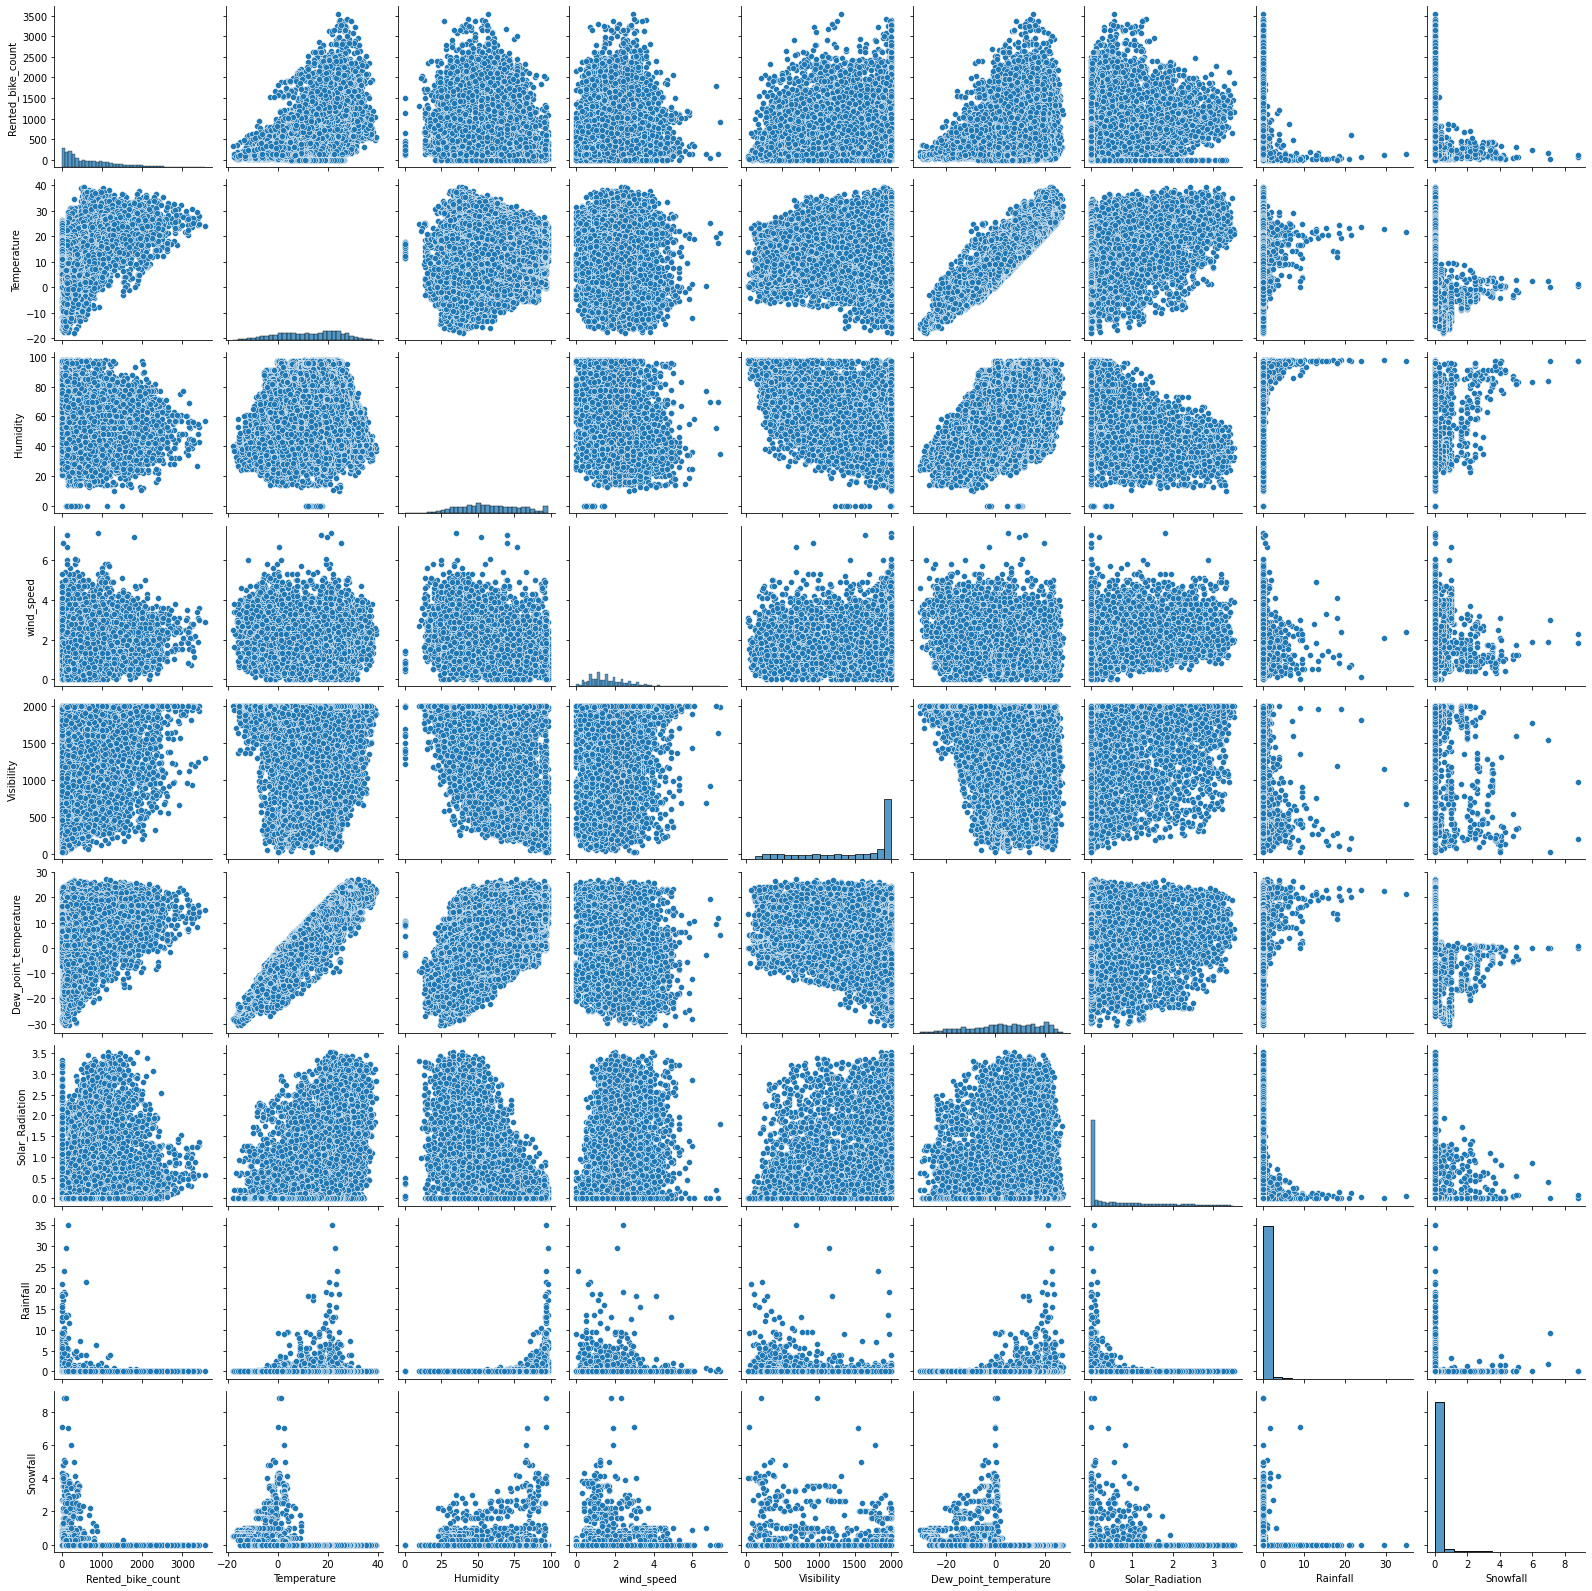

In [36]:
# Pair Plot visualization code
plt.figure(figsize=(15,10))
sns.pairplot(data=bike_df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

In [37]:
import scipy.stats as stats

import matplotlib.pyplot as plt

import statsmodels.api as sm


from scipy.stats import f_oneway

from scipy.stats import chi2_contingency

from statsmodels.formula.api import ols

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* H0 : The bike's renting cnt in working days and non- working days are equal.
* Ha : The bike's renting cnt in working days and non- working days is not equal.

#### 2. Perform an appropriate statistical test.

In [38]:
# Perform Statistical Test to obtain P-Value
bike_df_copy=bike_df
bike_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_bike_count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

In [39]:
alpha=0.05
bike_df_copy['weekdays_weekend'].value_counts(normalize=True) *100

0    71.506849
1    28.493151
Name: weekdays_weekend, dtype: float64

In [40]:
bike_df_copy['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

In [41]:
working_days=bike_df_copy[bike_df_copy['weekdays_weekend']== 0].sample(2000,replace=False)
non_working_days=bike_df_copy[bike_df_copy['weekdays_weekend']== 1].sample(2000,replace=False)

round(working_days['Rented_bike_count'].std()**2,2), round(non_working_days['Rented_bike_count'].std()**2 ,2)

(423282.79, 368182.93)

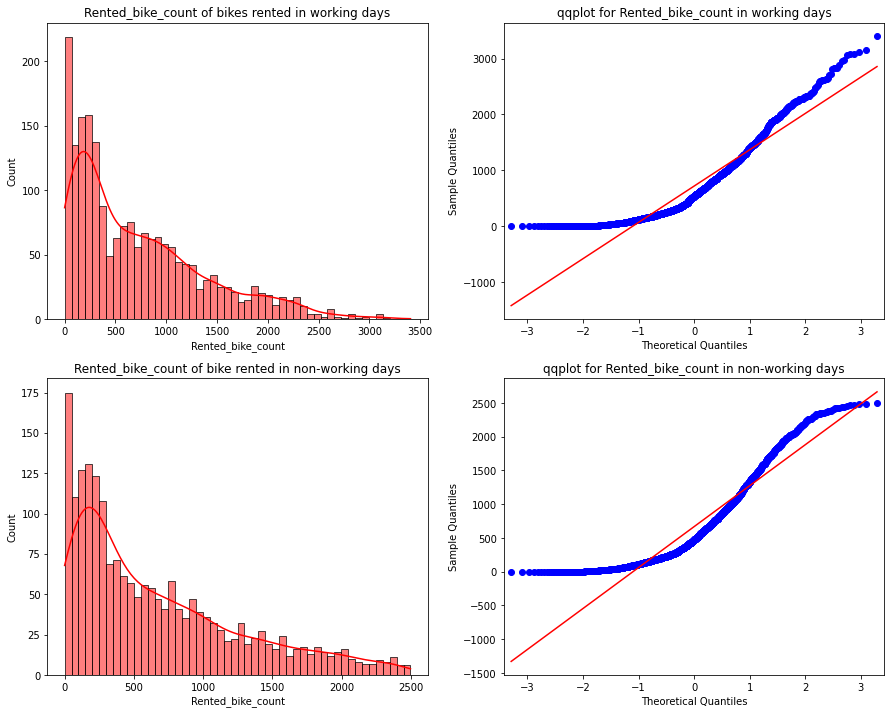

In [42]:
#Checking the normality
fig = plt.figure(figsize = (15,12))

ax1 = fig.add_subplot(221)
sns.histplot(data = working_days, x = 'Rented_bike_count' , bins = 50, kde = True, ax = ax1, color = 'red')
ax1.set_title('Rented_bike_count of bikes rented in working days')

ax2 = fig.add_subplot(222)
sm.qqplot(working_days['Rented_bike_count'], line = 's', ax = ax2)
ax2.set_title('qqplot for Rented_bike_count in working days')

ax3 = fig.add_subplot(223)
sns.histplot(data = non_working_days, x = 'Rented_bike_count' , bins = 50, kde = True, ax = ax3, color = 'red')
ax3.set_title('Rented_bike_count of bike rented in non-working days')

ax4 = fig.add_subplot(224)
sm.qqplot(non_working_days['Rented_bike_count'], line = 's', ax = ax4)
ax4.set_title('qqplot for Rented_bike_count in non-working days')

plt.show()

In [ ]:
t_test, p_value = stats.ttest_ind(working_days['Rented_bike_count'],non_working_days['Rented_bike_count'],
                                  alternative='greater', equal_var = False)
t_test, p_value

(1.74550097347561, 0.04048745937457454)

In [ ]:
def htResult(p_value):
    significance_level = 0.05
    if p_value <= significance_level: 
        print('Reject NULL HYPOTHESIS') 
    else: 
        print('Fail to Reject NULL HYPOTHESIS')

htResult(p_value)

Reject NULL HYPOTHESIS


##### Which statistical test have you done to obtain P-Value?

Two - Sample T-Test

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***